<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">


# Analise e exploração de dados usando SQL
# Projeto realizado para conclusão do módulo: SQL do Curso de Análise de Dados da EBAC Escola Britanica de Artes e Tecnologia

**Neste projeto vamos explorar uma base de dados com perfis de crédito de clientes de uma instituição financeira.
Sera usado o dataset disponivel no Kaggle no link https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset**


**Tabela criada no AWS Athena / S3 Bucket e no MSSQL Server**

**Devido ao volume dos dados as consultas foram executadas no MSSQL Server**



O Dataset original posssui 10127 linhas e possui as seguintes colunas:

 * id - id do cliente (sera excluida por ser irrelevante)                     
 * default - IDENTIFICAR (sera excluida por ser irrelevante)                 
 * idade - Idade do Cliente                  
 * sexo - Sexo do Cliente                     
 * dependentes - Numero de dependentes do Cliente              
 * escolaridade - Nivel de Escolaridade do Clinete              
 * estado_civil - Estado Civil do Cliente
 * salario_anual - Faixa Salarial do Clienye
 * tipo_cartao - Tipo de Cartao do Cliente            
 * meses_de_relacionamento - Tempo de relacionamento do Cliente com a Instituicao em meses
 * qtd_produtos - Quantidade de Produtos da Instituicao o Cliente Possui          
 * iteracoes_12m - Quantidade de transacoes realizadas pelo cliente em um ano             
 * meses_inativo_12m - Meses em que o Cliente ficou sem operar junto a instituição         
 * limite_credito - Limite de Credito do Cliente           
 * valor_transacoes_12m - Valor total de transacoes realizadas em um Ano   
 * qtd_transacoes_12m - Quantidade de transacoes realizadas em um Ano.

**Vamos analizar a base de dados usando SQL e algumas colunas**

*Quantidade de Linhas da tabela*

**select count(tipo_cartao)  as Total_linhas  from credito_completo**

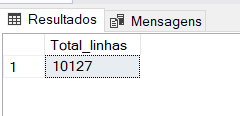

*Quantidade de Clientes por Sexo*

**select count(*) as Quantidade, sexo from credito_completo group by sexo**

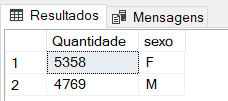

*A tabela nao apresenta diferença significatva em relação ao sexo dos clientes*

*Nivel de Escolaridade dos Clientes*

**SELECT DISTINCT escolaridade as Escolaridade FROM credito_completo**

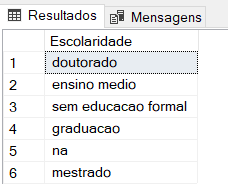

*Podemos observar que temos dados "NA" que nao são valores nulos, podendo ser erro durante a inserção dos dados ou dados nao informados*

*Tipo de Cartao dos Clientes*

**SELECT DISTINCT tipo_cartao as Cartoes FROM credito_completo**

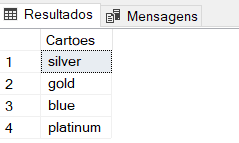


*Faxa Salarial dos Clientes*

**select salario_anual from credito_completo group by salario_anual order by salario_anual desc**

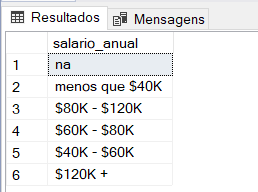

*Também na coluna de Faixa de Sálario encontramos dados "NA" que nao são valores nulos, podendo ser erro durante a inserção dos dados ou dados não informados*

###Apos uma breve demonstração do conteudo da base de dados, vamos usar o Pandas e o Plotly, para gerar graficos e comparar a relação entre os tipos de cartoes dos clientes e as outras colunas###


In [3]:
#Importando os paotes que serão utilizados
import pandas as pd
import plotly.express as px

In [4]:
# Criando o Datafreme a partir de um arquivo CSV
tabela = pd.read_csv('credito_completo.csv')

In [5]:
# Verificando o conteudo do Dataframe
display(tabela)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,na,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,na,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


In [6]:
# Analisando a estrutura do Dataframe e se existem valores nulos
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [7]:
# Exibir os total e percentual por tipo de cartao
display(tabela['tipo_cartao'].value_counts())
display(tabela['tipo_cartao'].value_counts(normalize=True).map("{:.2%}".format)) # codigo com formatacao

,count
tipo_cartao,
blue,9436
silver,555
gold,116
platinum,20


,proportion
tipo_cartao,
blue,93.18%
silver,5.48%
gold,1.15%
platinum,0.20%


In [8]:
# Excluindo as colunas que nao serao usadas na analise
tabela_grafico = tabela.drop(['id', 'default', 'dependentes', 'estado_civil'], axis=1)

In [9]:
# Criando novo Dataframe apos excluir as colunas acima apenas para geração dos gráficos comparativos
tabela_grafico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   idade                    10127 non-null  int64 
 1   sexo                     10127 non-null  object
 2   escolaridade             10127 non-null  object
 3   salario_anual            10127 non-null  object
 4   tipo_cartao              10127 non-null  object
 5   meses_de_relacionamento  10127 non-null  int64 
 6   qtd_produtos             10127 non-null  int64 
 7   iteracoes_12m            10127 non-null  int64 
 8   meses_inativo_12m        10127 non-null  int64 
 9   limite_credito           10127 non-null  object
 10  valor_transacoes_12m     10127 non-null  object
 11  qtd_transacoes_12m       10127 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 949.5+ KB


In [10]:
# Gerando gráficos comparando a coluna "Tipo_cartao" com os outros dados da tabela
for coluna in tabela_grafico.columns:
    grafico = px.histogram(tabela_grafico, x=coluna, color='tipo_cartao')
    grafico.show()

### Nos gráficos gerados podemos ver que a grande maioria dos clientes possuem cartão "Gold" e que não há uma relação direta entre o tipos de cartão e outras colunas como Escolaridade, Faixa Salarial, Quantidade de Produtos ou de transaç]oes dos clientes.

###Após a análise dos gráficos, vamos fazer mais algumas explorações usando o MSSql Server
*Como parametro de analise irei comparar os cartões com a maior e menor quantidade entre os clientes (Gold e Platinum, respectivamente)*


*Primeiro vamos verificar a quantidade de clientes por tipo de cartão*

**select count(*) as Quantidade, tipo_cartao from credito_completo group by tipo_cartao order by tipo_cartao asc**

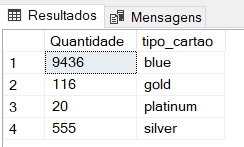

*Como já haviamos constatado a maioria dos clientes (93%) possuem cartão "gold" e a minoria (0,20%) possuem cartao 'platinum"*

###Verificando a relacao entre a escolaridade, o limite de credito e o tipo de cartão

**select top(20) escolaridade, limite_credito, tipo_cartao from credito_completo**

**where tipo_cartao = 'gold' or tipo_cartao = 'platinum' and limite_credito > 1000000**

**order by limite_credito desc****

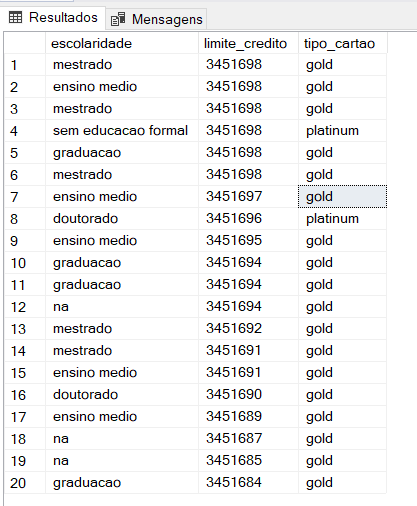

*Por essa Query não é possivel estabelecer um criterio entre o tipo de cartão oferecido ao cliente em relação a sua escolaridade e o seu limite de credito.*

###Verificando a relacao entre a escolaridade, o salário anual e o tipo de cartão

**select top(20) escolaridade, salario_anual, tipo_cartao from credito_completo**

**where tipo_cartao = 'platinum' or tipo_cartao = 'gold'**

**order by salario_anual desc**

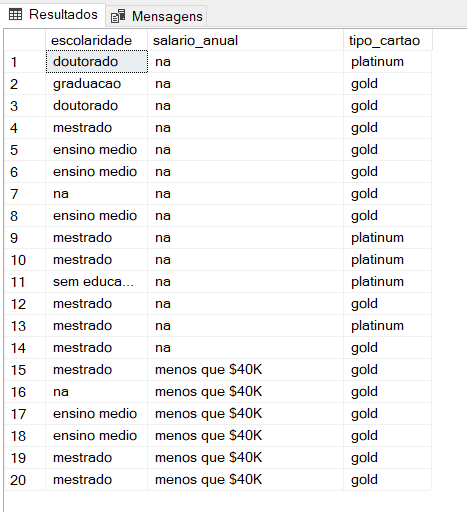

*Mais uma vez não fica claro a relação entre o tipo de cartao oferecido, a escolaridade e o sálario anual do cliente*


###Para finalizar, uma comparação mais abrangente onde analizamos a comparação entre o tipo de cartao do cliente, e a relação ao salario anual o valor das transações durante o ano, a quantidade de transações no mesmo periodo e a quantidade de produtos o cliente possui.

**select top(20) tipo_cartao, salario_anual, valor_transacoes_12m, qtd_transacoes_12m, qtd_produtos from credito_completo**

**where tipo_cartao = 'platinum' or tipo_cartao = 'gold'**

**order by valor_transacoes_12m, qtd_transacoes_12m, qtd_produtos**

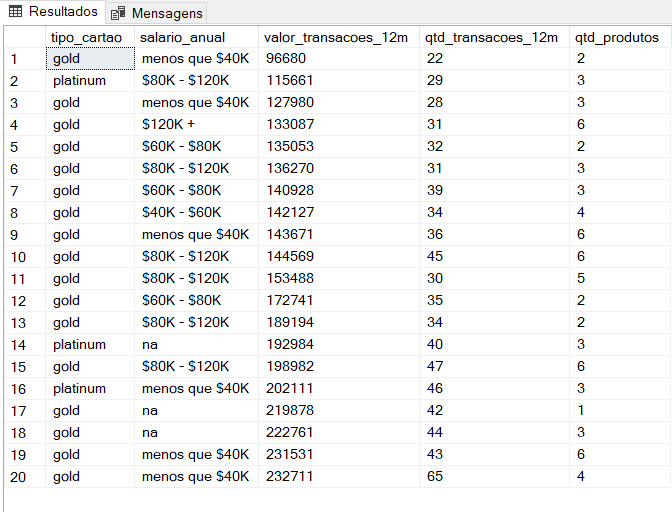

*Mesmo após adcionar a análise as informações referentes a valores, transações e produtos o criterio para determinar o tipo de cartão oferecido ao cliente nao ficou claro.

#Conclusão:#

###Verificamos o conteudo da base de dados, a quantidade de clientes por sexo, quantidade de cartões que os clientes possuem, a escolaridade, a faixa salarial e o relacionamento dos clientes com a instituicao financeira##

###Comparamos atravez de gráficos a relacao entre os tipos de cartões e as demais colunas da tabela###

###Apos verificar a quantidade de cartões comparando com cada coluna nao foi possivel estabelecer uma relação que determinasse qual seria o tipo de cartão oferecido a cada perfil de cliente
